In [1]:
#import libraries
import numpy as np #for arrays
import pandas  as pd #for dataframes(rows,cols)
import matplotlib.pyplot as plt # for plotting
%matplotlib inline 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder #to convert categorical value in to numerical values
from sklearn.model_selection import train_test_split # to split data into train and test
import warnings
warnings.filterwarnings('ignore')

In [2]:
#import  the data
data=pd.read_csv('data/new_train2.csv')
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,failure,no
2,55,retired,married,basic.4y,no,no,no,cellular,jul,mon,550,1,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,nonexistent,no
4,55,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,services,single,high.school,no,yes,no,cellular,jul,tue,192,1,nonexistent,no
32946,52,technician,married,professional.course,no,yes,no,cellular,nov,fri,64,1,failure,no
32947,54,admin.,married,basic.9y,no,no,yes,cellular,jul,mon,131,4,nonexistent,no
32948,29,admin.,married,university.degree,no,no,no,telephone,may,fri,165,1,nonexistent,no


In [3]:
data.shape #to check shape

(32950, 14)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome',
       'y'],
      dtype='object')

In [5]:
data.dtypes # to check the datatypes in all columns

age             int64
job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
duration        int64
campaign        int64
poutcome       object
y              object
dtype: object

In [6]:
data.describe() # it gives statistics for numerical variables

,age,duration,campaign
count,32950.000000,32950.000000,32950.000000
mean,39.605584,227.795357,2.189469
std,9.079007,158.757258,1.362850
min,26.000000,36.000000,1.000000
25%,32.000000,103.000000,1.000000
50%,38.000000,180.000000,2.000000
75%,47.000000,319.000000,3.000000
max,55.000000,550.000000,5.000000


In [7]:
#Separate categorical and numerical columns
cat_col = data.dtypes[data.dtypes == 'object']
num_col = data.dtypes[data.dtypes != 'object']

In [8]:
cat_col

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
y              object
dtype: object

In [9]:
num_col

age         int64
duration    int64
campaign    int64
dtype: object

In [10]:
data["y"].value_counts()

no     29238
yes     3712
Name: y, dtype: int64

# Data Exploration and Visualization


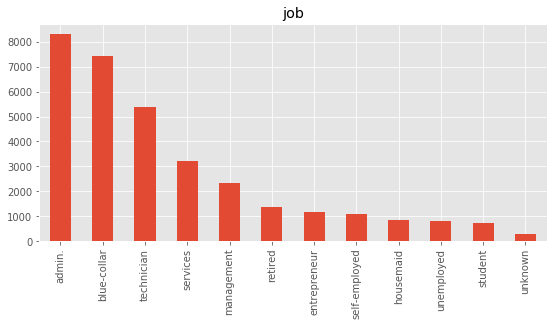

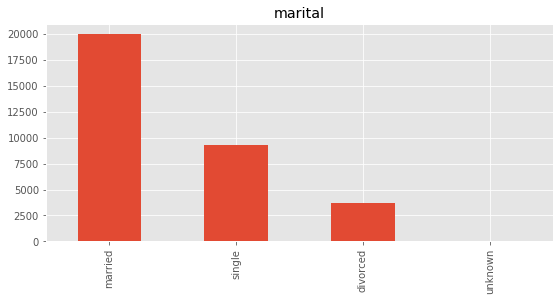

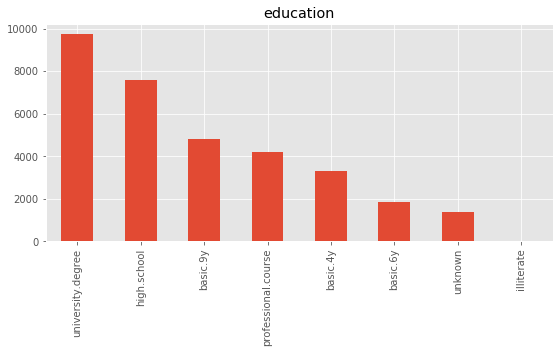

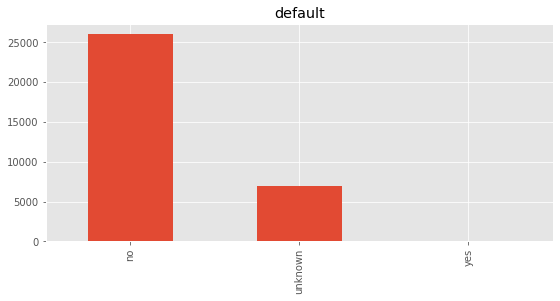

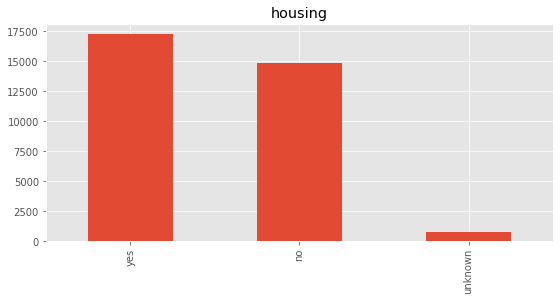

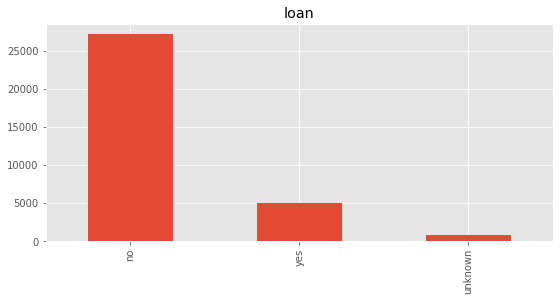

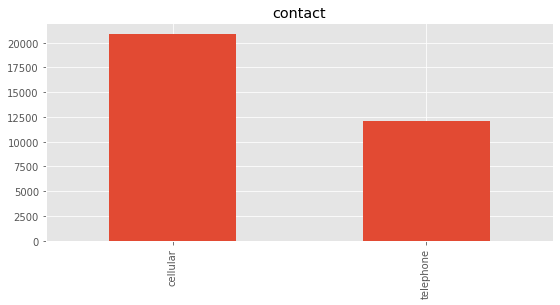

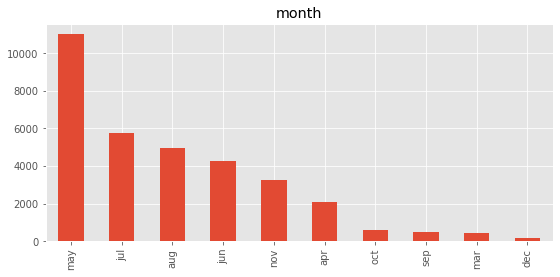

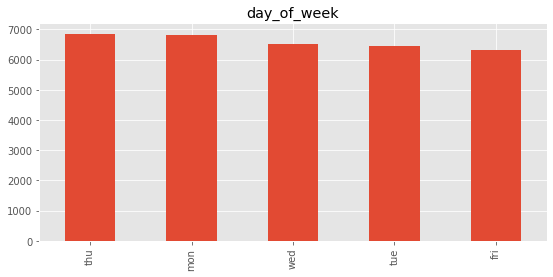

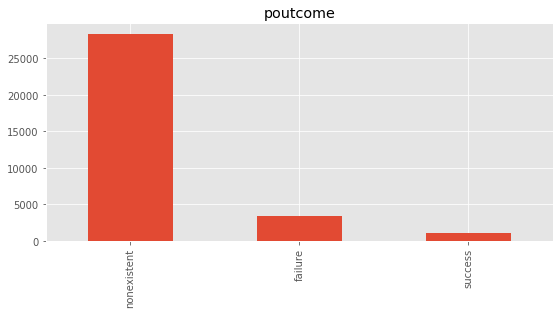

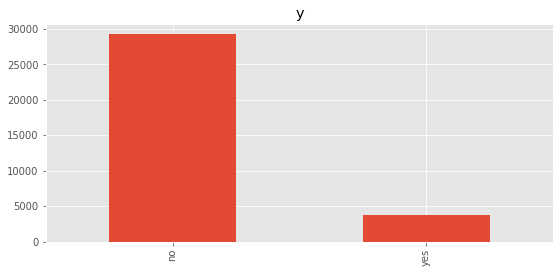

In [11]:
# Selecting the categorical columns
categorical_col = data.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    data[column].value_counts().plot(kind='bar')
    plt.title(column)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000010FC557CEC8>,
      dtype=object)

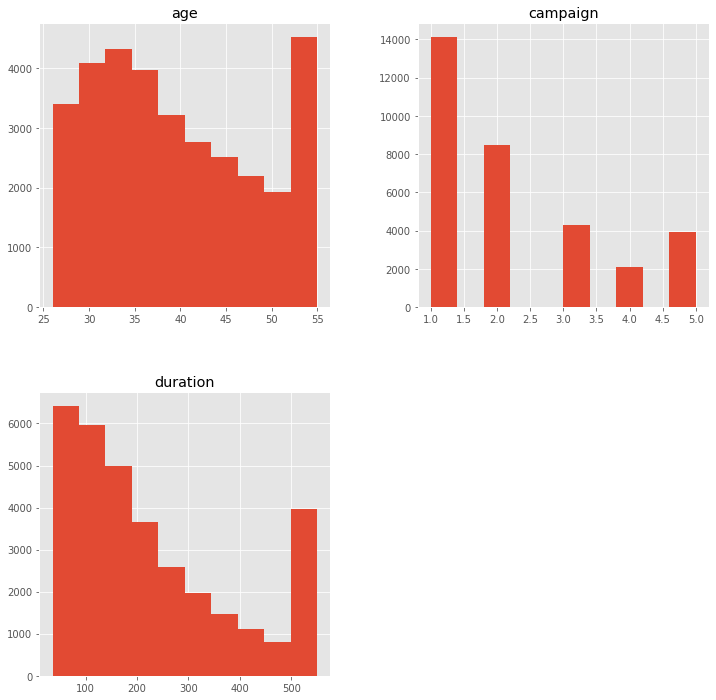

In [12]:
data[list(num_col.index)].hist(figsize = (12,12))

for column in num_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(data[column])
    plt.title(column)

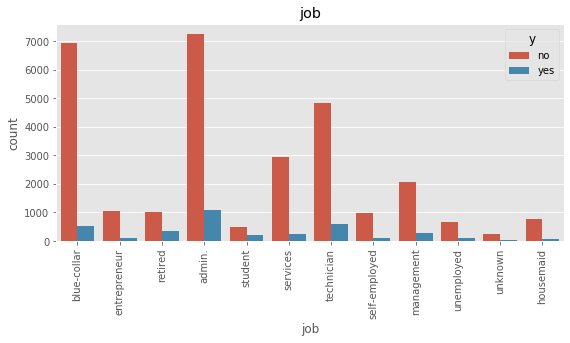

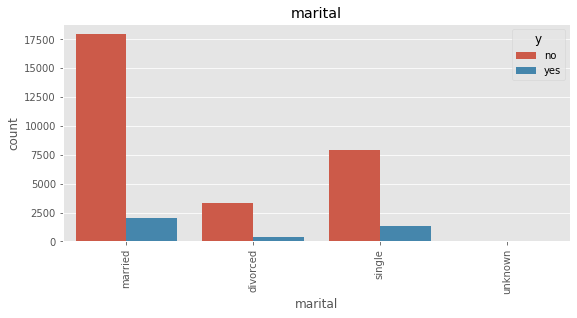

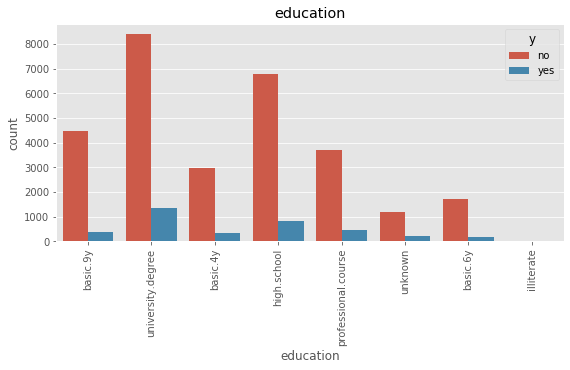

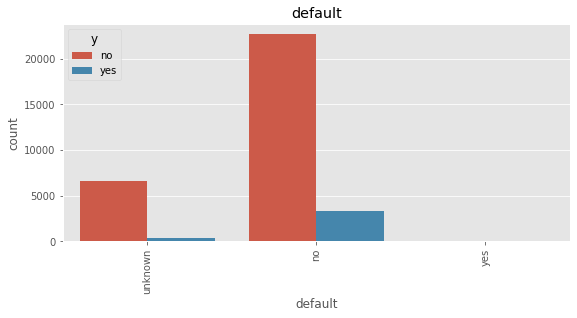

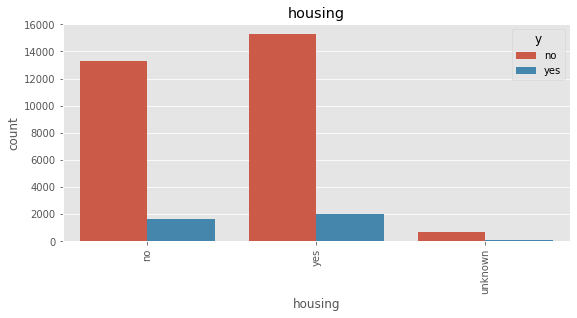

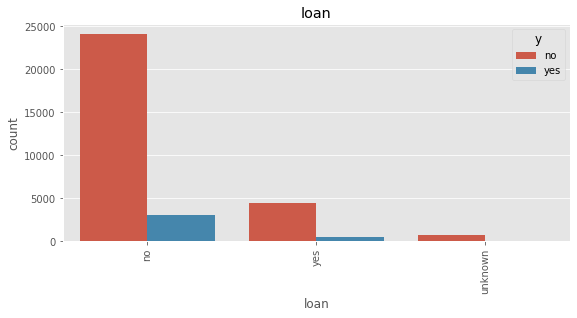

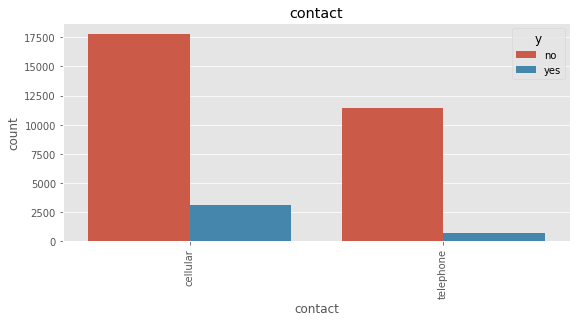

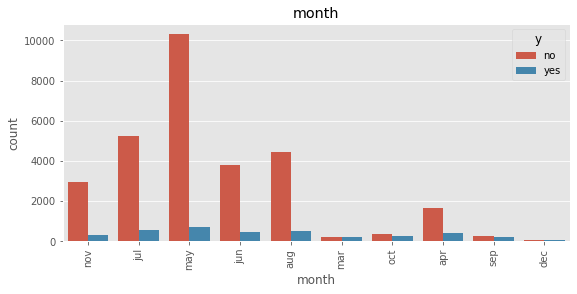

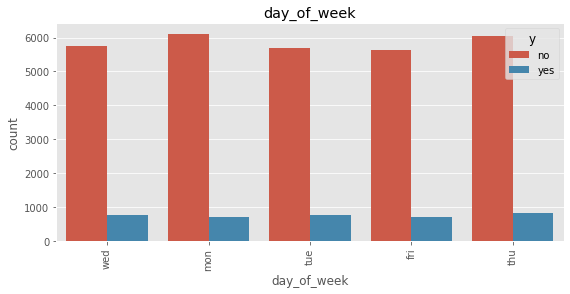

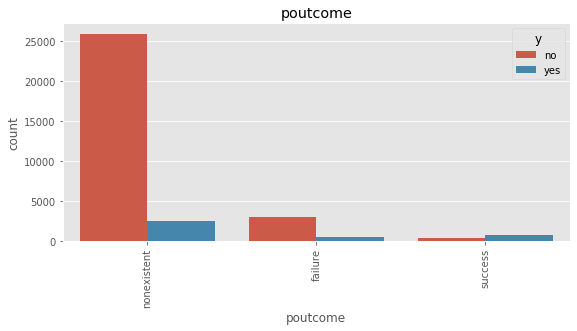

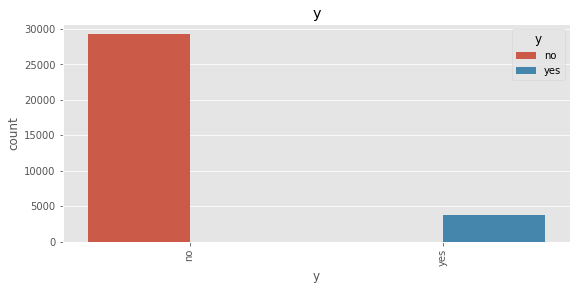

In [13]:

for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=data[column],hue=data['y'],data=data)
    plt.title(column)    
    plt.xticks(rotation=90)

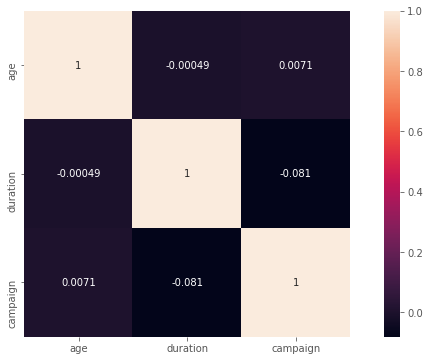

In [14]:
fig= plt.figure(figsize=(12,6))
sns.heatmap(data[list(num_col.index)].corr(),annot=True,square=True)
plt.show()

In [15]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split

In [16]:
# To convert categorical data in to numerical  data
from sklearn.preprocessing import LabelEncoder 
number = LabelEncoder()
data["job"]=number.fit_transform(data["job"])
data["marital"]=number.fit_transform(data["marital"])
data["education"]=number.fit_transform(data["education"])
data["default"]=number.fit_transform(data["default"])
data["housing"]=number.fit_transform(data["housing"])
data["loan"]=number.fit_transform(data["loan"])
data["contact"]=number.fit_transform(data["contact"])
data["month"]=number.fit_transform(data["month"])
data["day_of_week"]=number.fit_transform(data["day_of_week"])
data["poutcome"]=number.fit_transform(data["poutcome"])
data["y"]=number.fit_transform(data["y"])                                            
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome,y
0,49,1,1,2,1,0,0,0,7,4,227,4,1,0
1,37,2,1,6,0,0,0,1,7,4,202,2,0,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,1,0
4,55,5,0,6,0,0,0,0,4,3,368,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,1,0
32946,52,9,1,5,0,2,0,0,7,0,64,1,0,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,1,0
32948,29,0,1,6,0,0,0,1,6,0,165,1,1,0


In [17]:
X=data.iloc[:,:-1] #independent variables
X

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,49,1,1,2,1,0,0,0,7,4,227,4,1
1,37,2,1,6,0,0,0,1,7,4,202,2,0
2,55,5,1,0,0,0,0,0,3,1,550,1,1
3,36,0,1,6,0,2,0,1,6,1,120,2,1
4,55,5,0,6,0,0,0,0,4,3,368,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32945,28,7,2,3,0,2,0,0,3,3,192,1,1
32946,52,9,1,5,0,2,0,0,7,0,64,1,0
32947,54,0,1,2,0,0,2,0,3,1,131,4,1
32948,29,0,1,6,0,0,0,1,6,0,165,1,1


In [18]:
y=data.iloc[:,-1] # target variable
y

0        0
1        0
2        1
3        0
4        0
        ..
32945    0
32946    0
32947    0
32948    0
32949    0
Name: y, Length: 32950, dtype: int32

In [19]:
# split data randomly into 70% training and 30% test
X_train,x_test, y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=0)

# FITTING THE MODEL AND PREDICTING THE VALUES

In [20]:
# run Logistic Regression model
model = LogisticRegression()
# fitting the model
model.fit(X_train, y_train)
# predicting the values
y_scores = model.predict(x_test)



# GETTING THE METRICS TO CHECK OUR MODEL PERFORMANCE

ROC_AUC_SCORE is 0.5800676360122805


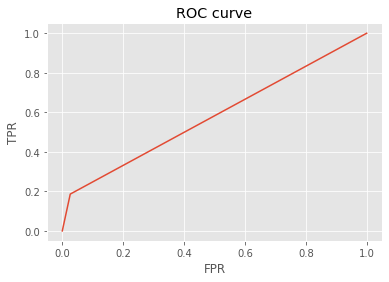

In [21]:

# getting the auc roc curve
auc = roc_auc_score(y_test, y_scores)
#print('Classification Report:')
#print(classification_report(y_val,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

### The above two steps are combined and run in a single cell for all the remaining models respectively

ROC_AUC_SCORE is 0.6789510184362678


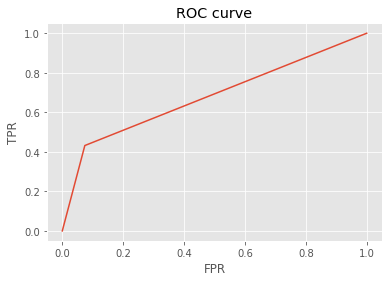

In [22]:
# Run Decision Tree Classifier
model = DecisionTreeClassifier()

model.fit(X_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
#print('Classification Report:')
#print(classification_report(y_test,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

ROC_AUC_SCORE is 0.6610711113189023


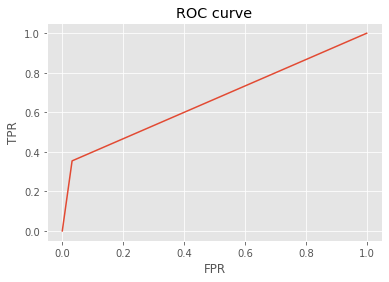

In [23]:
# run Random Forrest Classifier
model = RandomForestClassifier()

model.fit(X_train, y_train)
y_scores = model.predict(x_test)
auc = roc_auc_score(y_test, y_scores)
#print('Classification Report:')
#print(classification_report(y_test,y_scores))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_scores)
print('ROC_AUC_SCORE is',roc_auc_score(y_test, y_scores))
    
#fpr, tpr, _ = roc_curve(y_test, predictions[:,1])
    
plt.plot(false_positive_rate, true_positive_rate)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

# Grid-Search & Hyperparameter Tuning 

Hyperparameters are function attributes that we have to specify for an algorithm.

In the next step we will be using Grid search to come up with the best set and values for our hyperparameters

### Grid Search for Random Forest

In the below task, we write a code that performs hyperparameter tuning for a random forest classifier. We have used the hyperparameters `max_features`, `max_depth` and `criterion` for this task. Feel free to play around with this function by introducing a few more hyperparameters and chaniging their values

In [24]:
# splitting the data
X_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)
# selecting the classifier
rfc = RandomForestClassifier()
# selecting the parameter
param_grid = { 
'max_features': ['auto', 'sqrt', 'log2'],
'max_depth' : [4,5,6,7,8],
'criterion' :['gini', 'entropy']
             }
# using grid search with respective parameters
grid_search_model = GridSearchCV(rfc, param_grid=param_grid)
# fitting the model
grid_search_model.fit(X_train, y_train)
# printing the best parameters
print('Best Parameters are:',grid_search_model.best_params_)

Best Parameters are: {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}


### Applying the best parameters obtained using Grid Search on Random Forest model

In the task below, we fit a random forest model using the best parameters obtained using Grid Search. Since the target is imbalanced, we apply Synthetic Minority Oversampling (SMOTE) for undersampling and oversampling the majority and minority classes in the target respectively. 

__Kindly note that SMOTE should always be applied only on the training data and not on the validation and test data.__

You can try experimenting with and without SMOTE and check for the difference in recall. 

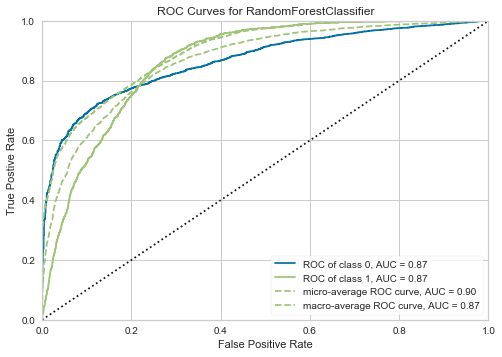

In [25]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE
from yellowbrick.classifier import roc_auc


# A function to use smote
def grid_search_random_forest_best(dataframe,target):
    
    # splitting the data
    x_train,x_val,y_train,y_val = train_test_split(dataframe,target, test_size=0.3, random_state=42)
    
    # Applying Smote on train data for dealing with class imbalance
    smote = SMOTE()
    
    X_sm, y_sm =  smote.fit_sample(x_train, y_train)
    # Intializing the Random Forrest Classifier
    rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)
    # Fit the model on data
    rfc.fit(X_sm, y_sm)
    # Get the predictions on the validation data
    y_pred = rfc.predict(x_val)
    # Evaluation of result with the auc_roc graph
    visualizer = roc_auc(rfc,X_sm,y_sm,x_val,y_val)


grid_search_random_forest_best(X,y)

## Prediction on the test data

In the below task, we have performed a prediction on the test data. We have used Random Forrest for this prediction. 

We have to perform the same preprocessing operations on the test data that we have performed on the train data. For demonstration purposes, we have preprocessed the test data and this preprocessed data is present in the csv file `new_test.csv`

We then make a prediction on the preprocessed test data using the random forrest model with the best parameter values we've got. And as the final step, we will read the `submission.csv`and concatenate this prediction with the `Id` column which is the unique client id and then convert this into a csv file which becomes the `final_submission.csv`

In [26]:
# Preprocessed Test File
test = pd.read_csv('data/new_test.csv')
test.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,poutcome
0,32,4,0,6,0,0,0,0,3,3,131,5,1
1,37,10,3,6,0,0,0,0,4,3,100,1,1
2,55,5,0,5,1,2,0,0,3,2,131,2,1
3,44,2,1,0,1,0,0,1,4,3,48,2,1
4,28,0,2,3,0,0,0,0,5,0,144,2,1


In [27]:
# Initialize Smote
smote = SMOTE()

# Applying SMOTE
X_sm, y_sm =  smote.fit_sample(X_train, y_train)

# Initialize our Random forrest model with the best parameter values derived
rfc = RandomForestClassifier(max_features='log2', max_depth=8, criterion='gini',random_state=42)

# Fitting the model
rfc.fit(X_sm,y_sm)

# Predict on the preprocessed test file
y_pred = rfc.predict(test)

# storing the predictions
prediction = pd.DataFrame(y_pred,columns=['y'])

# reading the submission file with client ids
submission = pd.read_csv('data/submission.csv')

# Concatenate predictions and create our final submission file
final_submission = pd.concat([submission['Id'],prediction['y']],1)

# Results
final_submission.head()

,Id,y
0,14455,0
1,36380,0
2,40076,0
3,10778,0
4,27939,0
